In [1]:
import matplotlib.pyplot as plt
from hmm import *
from pyhmmer.plan7 import *
from phmm2hmm import toHMM
from hmm2smm import to_smm
from smm2encoding import smm_to_autoencoder
from collections import defaultdict
from seq_split import seq_split_by_hmm_cycles
from distanceMatrix import build_distance_matrix, matrix_closure, connected_components, distance_values, clusterings_with_hors, normalize_loop

In [2]:
with HMMFile("data/DF0000014.hmm") as hmm_file:
#with HMMFile("data/sample.hmm") as hmm_file:
    phmm = hmm_file.read()

In [3]:
input_hmm = toHMM(phmm)

In [4]:
smm,smm_encoder,smm_decoder = to_smm(input_hmm, 1/16000)

In [5]:
encoder, decoder = smm_to_autoencoder(smm, cutoff_prob=1.0/100000, multi_symbol_encoding=True, multi_symbol_depth_limit=3)

In [6]:
fasta_file = open("./data/chr11_HSA_simple.fasta")
seqStr = fasta_file.read()
fasta_file.close()

In [7]:
code_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
code_seq = np.array([code_map[b] for b in seqStr])
train_seq = code_seq.reshape(1, -1)

In [8]:
(start_dna_seq, dna_seqs, _), (start_state_seq, state_seqs, _) = seq_split_by_hmm_cycles(code_seq, input_hmm)

In [9]:
start_smm_seq = smm_encoder(start_state_seq, start_dna_seq, from_start = False, until_end = False)
smm_seqs = [smm_encoder(state_seq, dna_seqs[pos], from_start = False, until_end = False) for pos, state_seq in enumerate(state_seqs)]

In [10]:
encoder_exec = encoder.get_execution()
start_code = encoder_exec.read(start_smm_seq)
codes = [encoder_exec.read(smm_seq) for smm_seq in smm_seqs]

In [11]:
code_dists = build_distance_matrix(codes)

(array([  5.,   3.,   4.,   2.,   3.,   9.,   4.,   6.,  11.,   2.,   7.,
          3.,   5.,   4.,  10.,  11.,   8.,   6.,   6.,   2.,  11.,   9.,
          6.,   9.,  11.,   7.,  10.,  16.,   9.,  11.,   9.,   8.,  17.,
         14.,  27.,  13.,   7.,  17.,  25.,  13.,  22.,  14.,  17.,  13.,
         18.,  13.,  14.,  17.,   8.,  17.,  22.,  31.,  31.,  19.,  29.,
         39.,  31.,  45.,  53.,  84.,  85., 110., 124., 163., 179., 248.,
        245., 242., 225., 226., 181., 214., 194., 165., 152., 121.,  94.,
         85.,  79.,  51.,  38.,  29.,  27.,  20.,  20.,  18.,   7.,   6.,
          7.,   8.,   4.,   2.,   1.,   4.,   4.,   3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 

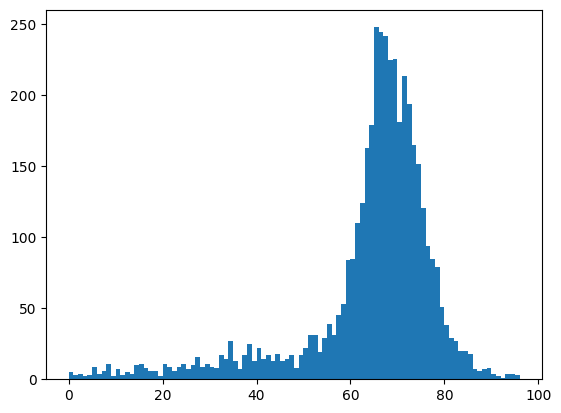

In [17]:
plt.hist(distance_values(code_dists), bins=96)

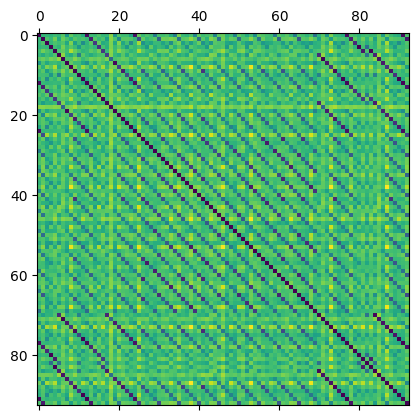

In [13]:
plt.matshow(code_dists)

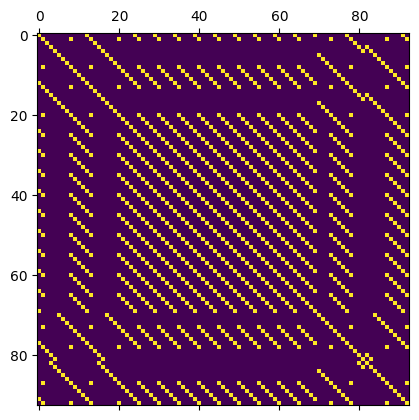

In [20]:
plt.matshow(matrix_closure(code_dists<=35))

In [15]:
code_clusterings = clusterings_with_hors(code_dists)

In [16]:
[
    str(clustering)
    for clustering in code_clusterings
]

["Num clusters: 12, Seq: ABCDEFGHBIJKABCDEFGHBIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKAFGHBIJKABCDELEFGHBIJKAB, Loops: ['BIJKA in [20:70]']",
 "Num clusters: 11, Seq: ABCDEFGHBIJKABCDEFGHBIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKABIJKAFGHBIJKABCDEDEFGHBIJKAB, Loops: ['BIJKA in [20:70]']",
 "Num clusters: 10, Seq: ABCDEDFGBHIJABCDEDFGBHIJABHIJABHIJABHIJABHIJABHIJABHIJABHIJABHIJABHIJADFGBHIJABCDEDEDFGBHIJAB, Loops: ['BHIJA in [20:70]']",
 "Num clusters: 9, Seq: ABCDEDFGBHDIABCDEDFGBHDIABHDIABHDIABHDIABHDIABHDIABHDIABHDIABHDIABHDIADFGBHDIABCDEDEDFGBHDIAB, Loops: ['BHDIA in [20:70]']",
 "Num clusters: 8, Seq: ABCDEDFGBCDHABCDEDFGBCDHABCDHABCDHABCDHABCDHABCDHABCDHABCDHABCDHABCDHADFGBCDHABCDEDEDFGBCDHAB, Loops: ['BCDHA in [20:70]']",
 "Num clusters: 7, Seq: ABCDEDFABCDGABCDEDFABCDGABCDGABCDGABCDGABCDGABCDGABCDGABCDGABCDGABCDGADFABCDGABCDEDEDFABCDGAB, Loops: ['ABCDG in [19:70]']",
 "Num clusters: 6, Seq: ABCDEDFABCDCABCDEDFABCDCABCDCABCDCABCDCABCDCABCDCABCDCABCDCABCDCABCDCADFABCDCAB